In [1]:
# ADA_II 
# HW1
#Huiwen Xu
#Qi Liu(Leader)

Data Link: https://www.kaggle.com/quantbruce/real-estate-price-prediction

Description:
This dataset is a real estate price prediction. Here are 7 va in this dataset, they are No, transaction date, house age, distance to the nearest MRT station, number of convenience stores, latitude, longitude, price of unit area

In [5]:
# import libraries to analysis the data and definite functions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas import DataFrame as df

In [85]:
# import data_file 
data_file=r"C:\Users\hx703\Desktop\x.csv"
data = np.genfromtxt(data_file, dtype=None, delimiter=",", names=True, encoding='ascii')


# First part:describe and explore the dataset

In [6]:
#describe the dataset
housedf=df(data)
housedf.describe()

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
housedf.head

<bound method NDFrame.head of       No  X1_transaction_date  X2_house_age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3_distance_to_the_nearest_MRT_station  X4_number_of_convenience_stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4    

In [8]:
mean = housedf.mean()
mean.describe

<bound method NDFrame.describe of No                                         207.500000
X1_transaction_date                       2013.148971
X2_house_age                                17.712560
X3_distance_to_the_nearest_MRT_station    1083.885689
X4_number_of_convenience_stores              4.094203
X5_latitude                                 24.969030
X6_longitude                               121.533361
Y_house_price_of_unit_area                  37.980193
dtype: float64>

In [9]:
median=housedf.median()
median.describe

<bound method NDFrame.describe of No                                         207.50000
X1_transaction_date                       2013.16700
X2_house_age                                16.10000
X3_distance_to_the_nearest_MRT_station     492.23130
X4_number_of_convenience_stores              4.00000
X5_latitude                                 24.97110
X6_longitude                               121.53863
Y_house_price_of_unit_area                  38.45000
dtype: float64>

In [86]:
housedf.shape

(414, 8)

In [34]:
std=housedf.std()
std.describe

<bound method NDFrame.describe of No                                         119.655756
X1_transaction_date                          0.281967
X2_house_age                                11.392485
X3_distance_to_the_nearest_MRT_station    1262.109595
X4_number_of_convenience_stores              2.945562
X5_latitude                                  0.012410
X6_longitude                                 0.015347
Y_house_price_of_unit_area                  13.606488
dtype: float64>

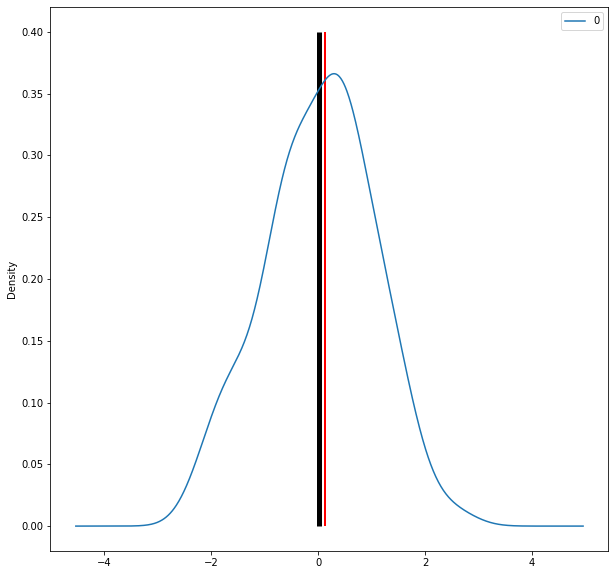

In [10]:
# test if the dataset is a norm distribution and explore the dataset
norm_data = pd.DataFrame(np.random.normal(size=100))
norm_data.plot(kind="density",
              figsize=(10,10))

plt.vlines(norm_data.mean(),     # Plot a black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0)

plt.vlines(norm_data.median(),   # Plot a red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red")



The picture shows that this dataset is a normal distribution. 

# Second part: Data visualization

Text(0.5, 1.0, 'Relationship between date and house price')

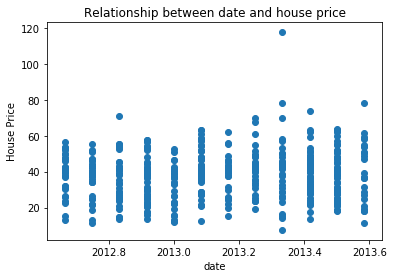

In [14]:
# relationship between transaction date and price
plt.scatter(housedf.X1_transaction_date, housedf.Y_house_price_of_unit_area)
plt.xlabel("date")
plt.ylabel("House Price")
plt.title("Relationship between date and house price")

This relationship is insignificant. 

Text(0.5, 1.0, 'Relationship between house age and house price')

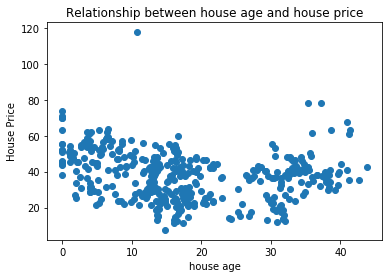

In [11]:
# relationship between house age and price
plt.scatter(housedf.X2_house_age, housedf.
Y_house_price_of_unit_area)
plt.xlabel("house age")
plt.ylabel("House Price")
plt.title("Relationship between house age and house price")

The relationship is not a linear regression

Text(0.5, 1.0, 'Relationship between distance to MRT and house price')

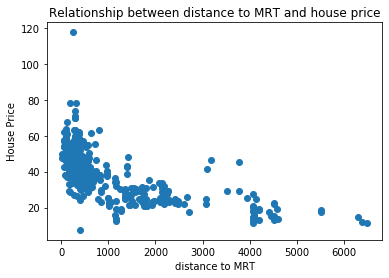

In [15]:
# relationship between distance to the nearest MRT station and price
plt.scatter(housedf.X3_distance_to_the_nearest_MRT_station, housedf.Y_house_price_of_unit_area)
plt.xlabel("distance to MRT")
plt.ylabel("House Price")
plt.title("Relationship between distance to MRT and house price")

This is a negative correlation

Text(0.5, 1.0, 'Relationship between numbers of convenient stores and house price')

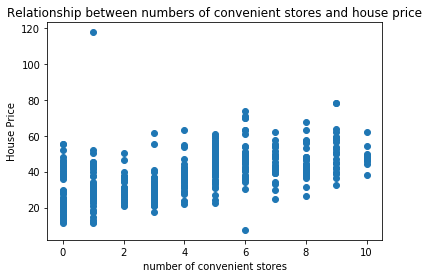

In [22]:
# relationship between number of convenience stores and price
plt.scatter(housedf.X4_number_of_convenience_stores, housedf.Y_house_price_of_unit_area)
plt.xlabel("number of convenient stores")
plt.ylabel("House Price")
plt.title("Relationship between numbers of convenient stores and house price")

This is a positive correlation

Text(0.5, 1.0, 'Relationship between latitude and house price')

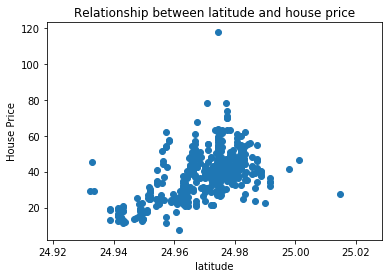

In [17]:
# relationship between latitudes and price
plt.scatter(housedf.X5_latitude, housedf.Y_house_price_of_unit_area)
plt.xlabel("latitude")
plt.ylabel("House Price")
plt.title("Relationship between latitude and house price")


This is not a linear relationship

Text(0.5, 1.0, 'Relationship between longitude and house price')

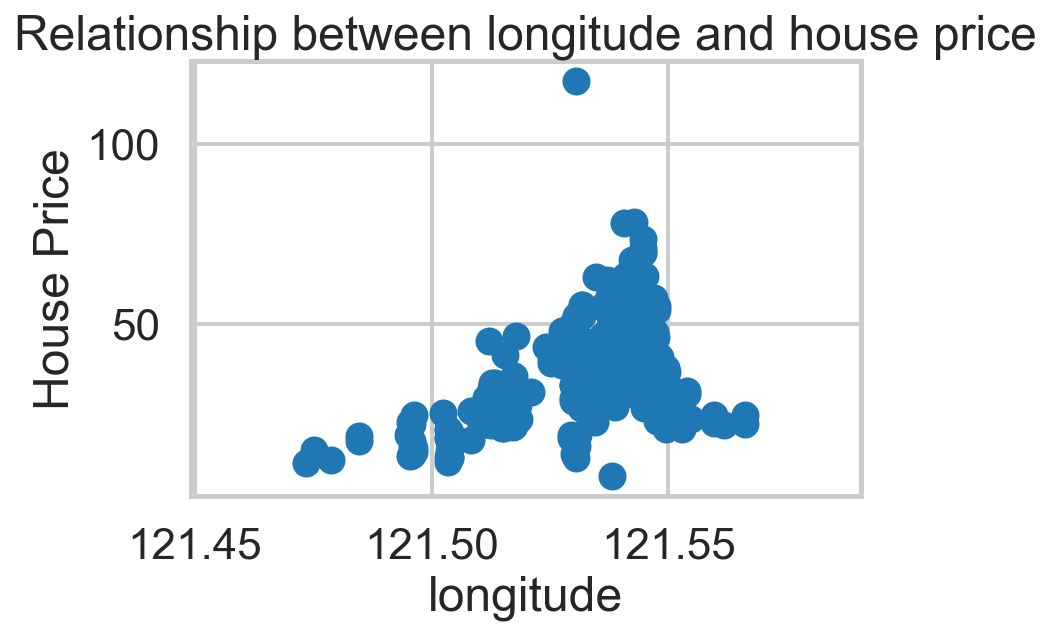

In [154]:
# relationship between longitude and price
plt.scatter(housedf.X6_longitude, housedf.Y_house_price_of_unit_area)
plt.xlabel("longitude")
plt.ylabel("House Price")
plt.title("Relationship between longitude and house price")

This is not a linear relationship

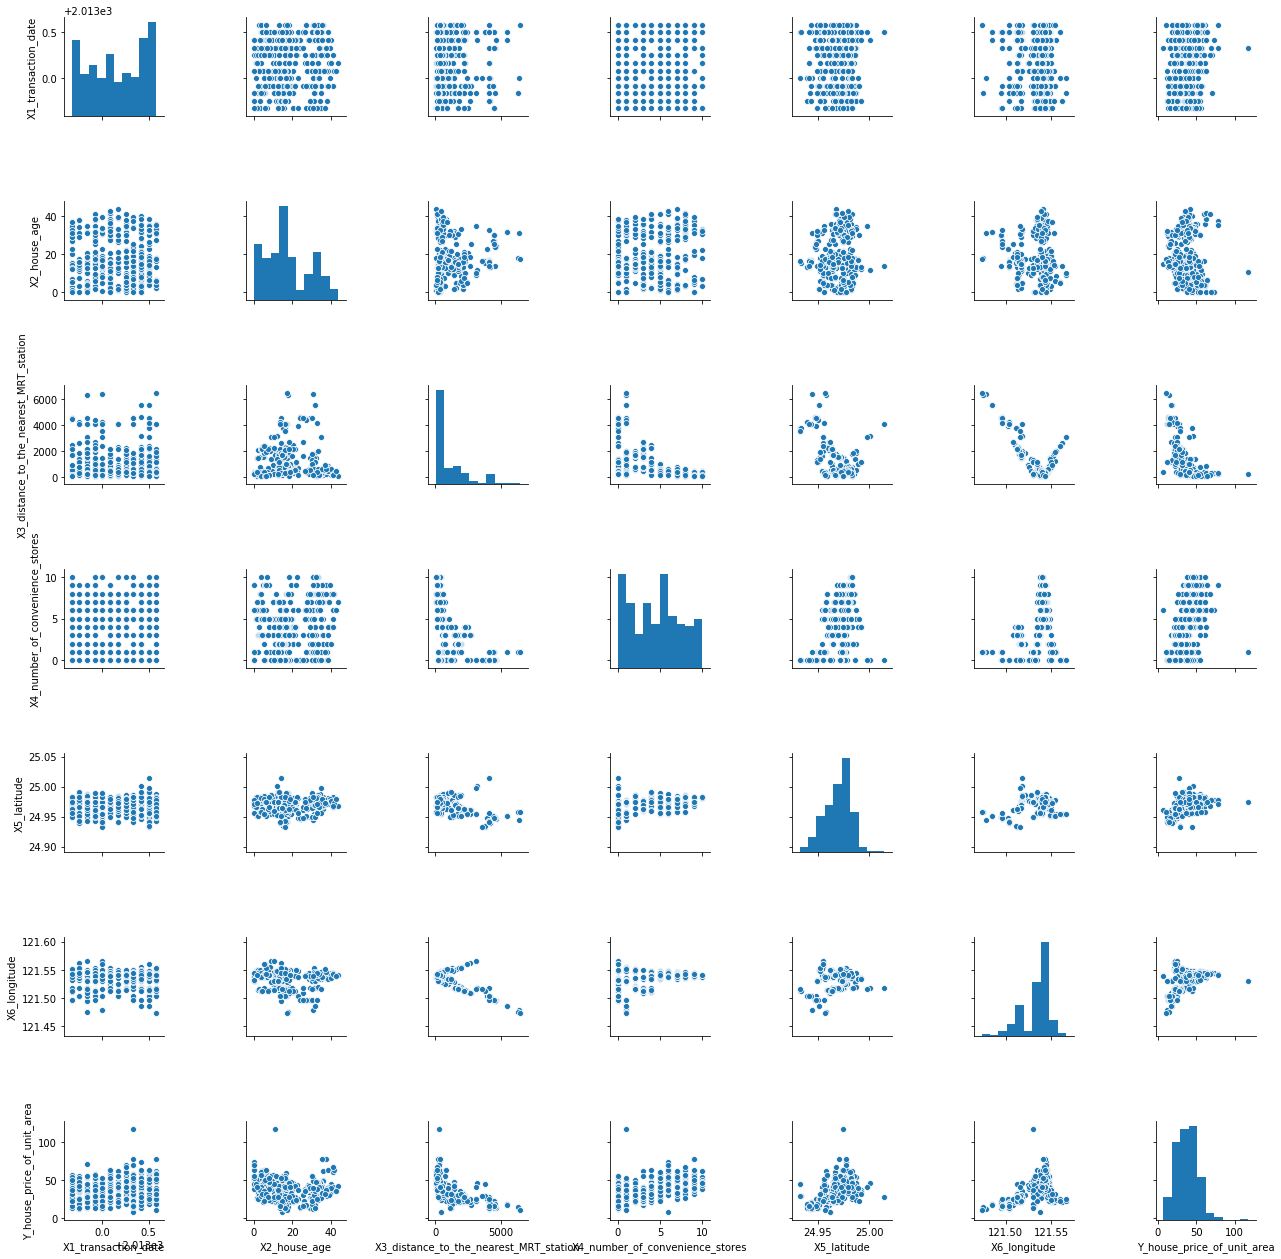

In [31]:
# Then, plot scatterplots to see the pair relationship
housedf_sub = housedf.drop(['No'], axis=1)
sns.pairplot(housedf_sub);

From pairs to pairs analysis, the obvious linear relationship is convenient stores & price and distance to the nearest MRT station & price.
More convenient stores will increase the house price.
Less distance to prt station will increase the house price. 
It shows that people will more prefer a place with more convenient shops and near to the mrt station. 

# Part three: calculate the MLR

Y=house price of unit area, X=all variable
Using all variable to fit the linear regression and predict the price of house unit area. 

In [61]:
#use skylearn to calculate
from sklearn.linear_model import LinearRegression
#create a LinearRegression object and drop the columns we don't need
X=housedf.drop(['No','X1_transaction_date','X2_house_age','X5_latitude','X6_longitude'],axis=1)
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# Use all 3 predictors to fit linear regression model
lm.fit(X, housedf.Y_house_price_of_unit_area)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# Calculate the intercept
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 2.0108359422010835e-12


In [64]:
#numbers of coefficients
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 3


In [83]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,X3_distance_to_the_nearest_MRT_station,-1.890415e-15
1,X4_number_of_convenience_stores,-1.150811e-16
2,Y_house_price_of_unit_area,1.000000e+00


In [69]:
# Calculate the Model R Square 
lm.score(X, housedf.Y_house_price_of_unit_area)

1.0

# Part four: Prediction

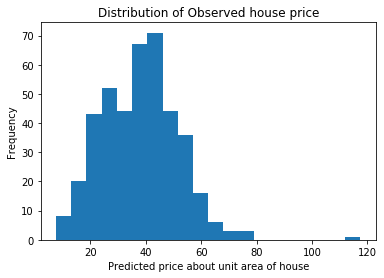

In [72]:
#Plot a histogram to predict the house price of unit area
plt.hist(lm.predict(X), bins=20)
plt.xlabel("Predicted price about unit area of house")
plt.ylabel("Frequency")
plt.title("Distribution of Observed house price");

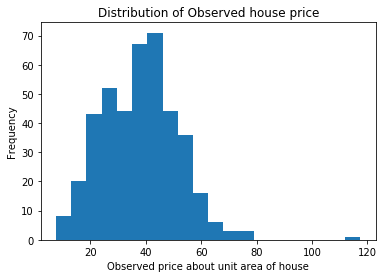

In [74]:
# plot histogram of observed prices
plt.hist(X.Y_house_price_of_unit_area, bins=20)
plt.xlabel("Observed price about unit area of house")
plt.ylabel("Frequency")
plt.title("Distribution of Observed house price");

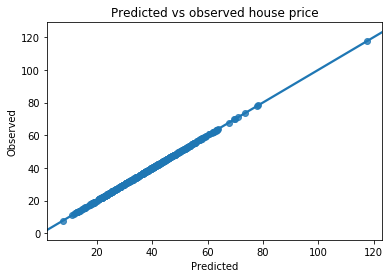

In [77]:
# plot relationship between observed and predicted prices
sns.regplot(x=lm.predict(X), y=X.Y_house_price_of_unit_area)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title(('Predicted vs observed house price'));

from the prediction model and R square, this model is a perfect model. 

# Part five: note

This model and R square is too perfect to let people believe, so we use OLS to calculate the MRL to test it again

In [82]:
# import OLS function from StatsModels
from statsmodels.formula.api import ols
# using the fit model to calculate MLR
fit=ols('Y_house_price_of_unit_area~X4_number_of_convenience_stores+X3_distance_to_the_nearest_MRT_station',data=X).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y_house_price_of_unit_area   R-squared:                       0.497
Model:                                    OLS   Adj. R-squared:                  0.494
Method:                         Least Squares   F-statistic:                     202.7
Date:                        Mon, 02 Mar 2020   Prob (F-statistic):           5.61e-62
Time:                                13:23:01   Log-Likelihood:                -1525.6
No. Observations:                         414   AIC:                             3057.
Df Residuals:                             411   BIC:                             3069.
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 39.1229      1.300     30.106      0.000      36.568      41.677
X4_number_of_convenience_stores            1.1976      0.203      5.912      0.000       0.799       1.596
X3_distance_to_the_nearest_MRT_station    -0.0056      0.000    -11.799      0.000      -0.007      -0.005
==============================================================================
Omnibus:                      191.943   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2159.977
Skew:                           1.671   Prob(JB):                         0.00
Kurtosis:                      13.679   Cond. No.                     4.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

the R square is 0.497, it is a medium fit degree. The coefficient about X4 and X5 is more realistic, so we decide to use the data from ols method.

# Part five: conclusion

 𝑌̂ 𝑖=𝛽̂ 0+𝛽̂ 1𝑋1+…𝛽̂ 13𝑋13
 Here Y=house price of unit area
 X1=distance to the nearest MRT station, coefficient=-0.0056
 X2=numbers of convenient stores, coefficient=1.1976
 intercept=39.1229
 We conclude that: Y=39.1229-0.0056X1+1.1976X2
